# Data Science in Marketing Customer Segmentation with Python (Clustering dan Algoritma K-Prototypes)

# Apa itu Clustering dan Algoritma K-Prototypes
Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.

K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.

Lalu bagaimana apabila di data kita terdapat gabungan kategorikal dan numerikal variabel? Jawabannya kita bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa dilakukan dengan menggunakan library k-modes yang didalamnya terdapat modul kprototype.

Untuk menggunakan algoritma kprototype kita perlu memasukkan jumlah cluster yang dikehendaki dan juga memberikan index kolom untuk kolom-kolom yang bersifat kategorikal.

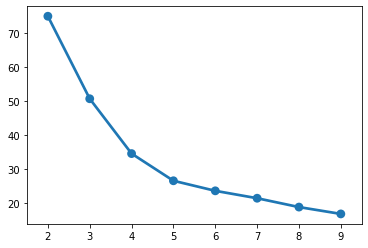

In [1]:
# Mencari Jumlah Cluster yang Optimal
# Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kita perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.
# Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

# Untuk melakukan hal ini kita perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikannya dengan line plot atau point plot.

from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes (n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost [k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

# Dari hasil tersebut, kita dapat mengetahui titik siku dari plot tersebut adalah pada saat k = 5. Sehingga kamu memutuskan untuk menggunakan 5 sebagai jumlah cluster optimalnya.

In [2]:
# Membuat Model
# Selanjutnya kita dapat melakukan pembuatan model dengan jumlah kluster yang sudah didapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.

import pandas as pd 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes ( n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

In [3]:
# Menggunakan Model
# Model yang sudah kita buat dapat digunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana. Kali ini kita akan menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di dataset.

import pandas as pd
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head())   

segmen pelanggan: [3 1 2 2 0 4 3 2 4 4 2 2 3 3 0 4 4 2 0 1 0 2 4 0 0 2 0 4 2 2 1 3 1 0 4 0 4
 3 4 1 4 0 4 0 4 0 2 3 4 3]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        3  
1      Cluster              2722700        1  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        0  


In [4]:
# Menampilkan Cluster Tiap Pelanggan
# Setelah kita menggabungkan data awal pelanggan dan cluster-nya, kita perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu dalam memberi nama tiap cluster berdasarkan karakteristiknya.

import pandas as pd
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID       Nama Pelanggan Jenis Kelamin  Umur     Profesi  \
4     CUST-005  Ibu Sri Wahyuni, IR        Wanita    41  Wiraswasta   
14    CUST-015     Shirley Ratuwati        Wanita    20  Wiraswasta   
18    CUST-019         Mega Pranoto        Wanita    32  Wiraswasta   
20    CUST-021     Lestari Fabianto        Wanita    38  Wiraswasta   
23    CUST-024        Putri Ginting        Wanita    39  Wiraswasta   
24    CUST-025       Julia Setiawan        Wanita    29  Wiraswasta   
26    CUST-027        Grace Mulyati        Wanita    35  Wiraswasta   
33    CUST-034       Deasy Arisandi        Wanita    21  Wiraswasta   
35    CUST-036       Ni Made Suasti        Wanita    30  Wiraswasta   
41    CUST-042         Yuliana Wati        Wanita    26  Wiraswasta   
43    CUST-044                 Anna        Wanita    18  Wiraswasta   
45    CUST-046         Elfira Surya        Wanita    25  Wiraswasta   

   Tipe Residen  NilaiBelanjaSetahun  cluster  
4    

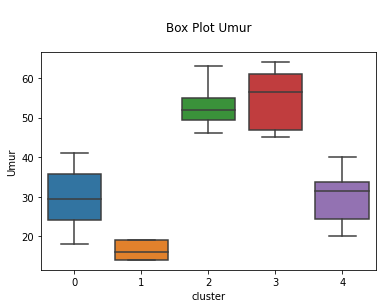

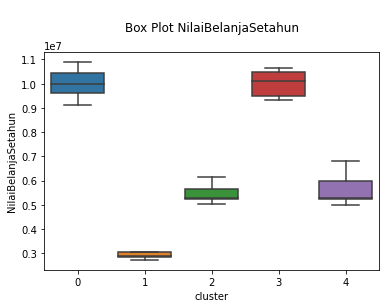

In [5]:
# Visualisasi Hasil Clustering - Box Plot
# Kita juga membuat visualisasi hasil clustering untuk dapat memudahkan dalam melakukan penamaan di tiap-tiap cluster.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt.title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

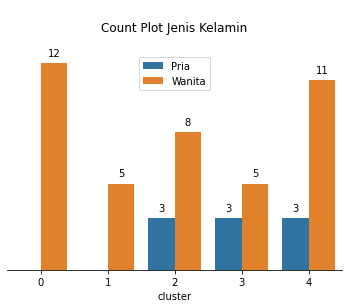

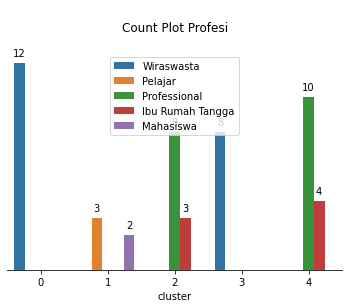

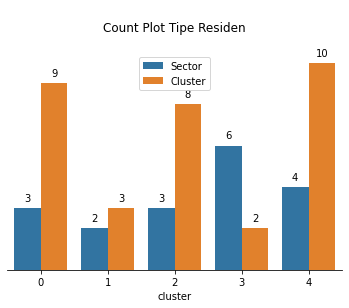

In [6]:
# Visualisasi Hasil Clustering - Count Plot
# Kita juga membuat visualisasi hasil clustering untuk dapat memudahkan dalam melakukan penamaan di tiap-tiap cluster.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  

In [7]:
# Menamakan Cluster
# Dari hasil observasi yang dilakukan dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:

# Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
# Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
# Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
# Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.
# Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t") 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 

# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

# Kesimpulan
Akhirnya kita sudah berhasil melakukan segmentasi pelanggan dan mendapatkan nama yang cocok untuk masing masing cluster, yaitu:

Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.

Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.

Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.

Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.